In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (MinMaxScaler, 
                                   StandardScaler, 
                                   LabelEncoder)
from sklearn.feature_selection import VarianceThreshold
from category_encoders import BinaryEncoder
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [210]:
data = {
    'height': [1.8, 1.65, 1.7, 1.9, 1.75],
    'weight': [80, 60, 75, 100, 88]
}

df = pd.DataFrame(data)
df

,height,weight
0,1.80,80
1,1.65,60
2,1.70,75
3,1.90,100
4,1.75,88


In [211]:
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_normalized

,height,weight
0,0.6,0.500
1,0.0,0.000
2,0.2,0.375
3,1.0,1.000
4,0.4,0.700


In [212]:
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_standard

,height,weight
0,0.464991,-0.045043
1,-1.278724,-1.546470
2,-0.697486,-0.420400
3,1.627467,1.456384
4,-0.116248,0.555528


In [213]:
(df['weight']-df['weight'].mean())/df['weight'].std()

0   -0.040288
1   -1.383205
2   -0.376017
3    1.302630
4    0.496879
Name: weight, dtype: float64

In [214]:
data2 = {
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Male'],
    'Salary': [5000, 5000, 5000, 5000, 5000]
}
df2 = pd.DataFrame(data2)
df2

,Gender,Salary
0,Female,5000
1,Male,5000
2,Female,5000
3,Male,5000
4,Male,5000


In [215]:
df_dummies = pd.get_dummies(df2, columns=['Gender'], drop_first=True)
df_dummies

,Salary,Gender_Male
0,5000,False
1,5000,True
2,5000,False
3,5000,True
4,5000,True


In [216]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Salary       5 non-null      int64
 1   Gender_Male  5 non-null      bool 
dtypes: bool(1), int64(1)
memory usage: 173.0 bytes


In [217]:
data3 = {
    'Colors': ['RED', 'BLUE', 'GREEN', 'GREEN', 'BLUE']
}
df3 = pd.DataFrame(data3)

In [218]:
label_encoder = LabelEncoder()
df3['Colors'] = label_encoder.fit_transform(df3['Colors'])
df3

,Colors
0,2
1,0
2,1
3,1
4,0


In [219]:
data4 = {
    'Colors': ['R', 'B', 'G', 'G', 'B', 'Y', 'Y', 'Y']
}
df4 = pd.DataFrame(data4)
df4

,Colors
0,R
1,B
2,G
3,G
4,B
5,Y
6,Y
7,Y


In [220]:
frequency = df4['Colors'].value_counts()
df4['color_freq'] = df4['Colors'].map(frequency)
df4

,Colors,color_freq
0,R,1
1,B,2
2,G,2
3,G,2
4,B,2
5,Y,3
6,Y,3
7,Y,3


In [221]:
data5 = {
    'Colors': ['R', 'B', 'G', 'G', 'R', 'B'],
    'Target': [1, 0, 0, 0, 1, 0]
}
df5 = pd.DataFrame(data5)

In [222]:
target_mean = df5.groupby('Colors')['Target'].mean()
df5['color_target_mean'] = df5['Colors'].map(target_mean)
df5

,Colors,Target,color_target_mean
0,R,1,1.0
1,B,0,0.0
2,G,0,0.0
3,G,0,0.0
4,R,1,1.0
5,B,0,0.0


In [223]:
data6= {
    'Colors': ['R', 'B', 'G', 'L', 'G', 'G', 'O', 'B', 'B', 'A']
}
df6 = pd.DataFrame(data6)

In [224]:
encoder = BinaryEncoder()
df_binary = encoder.fit_transform(df6['Colors'])
df_binary

,Colors_0,Colors_1,Colors_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,0,1,1
5,0,1,1
6,1,0,1
7,0,1,0
8,0,1,0
9,1,1,0


In [225]:
data7 = {
    'Size': ['Small', 'Medium', 'Large']
}
df7 = pd.DataFrame(data7)
df7

,Size
0,Small
1,Medium
2,Large


In [226]:
size_mapping = {"Small": 1, 'Medium': 2, 'Large': 3}
df7['Size_category'] = df7['Size'].map(size_mapping)
df7

,Size,Size_category
0,Small,1
1,Medium,2
2,Large,3


In [227]:
data8 = {
    'Income': [30000, 35000, 40000, 70000, 80000, 90000, 130000, 200000, 300000, 500000]
}
df8 = pd.DataFrame(data8)
df8

,Income
0,30000
1,35000
2,40000
3,70000
4,80000
5,90000
6,130000
7,200000
8,300000
9,500000


Normalizeaza datele(dupa clopotele lui Gauss)

In [228]:
df8['boxcos'], _ = boxcox(df8['Income'])
df8

,Income,boxcos
0,30000,3.757233
1,35000,3.769358
2,40000,3.779498
3,70000,3.818564
4,80000,3.827121
5,90000,3.834440
6,130000,3.855978
7,200000,3.878864
8,300000,3.898307
9,500000,3.920209


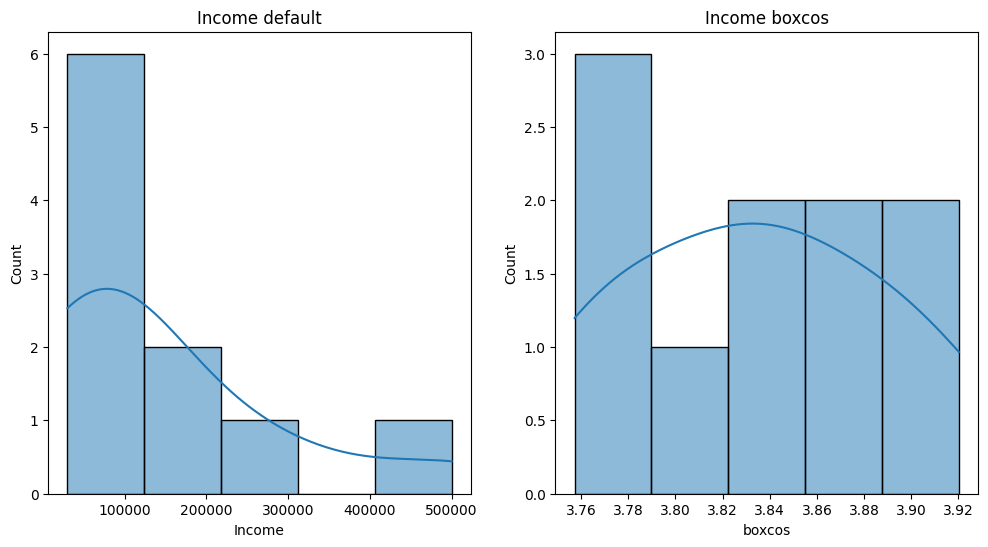

In [229]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df8['Income'], kde=True)
plt.title('Income default')

plt.subplot(1, 2, 2)
sns.histplot(df8['boxcos'], kde=True)
plt.title('Income boxcos')
plt.show()

In [230]:
data9 = {
    'Feature 1': [5, 4, 4, 5],
    'Target': [12, 14, 15, 12]
}
df9 = pd.DataFrame(data9)
df9

,Feature 1,Target
0,5,12
1,4,14
2,4,15
3,5,12


In [231]:
df9.corr()

,Feature 1,Target
Feature 1,1.00000,-0.96225
Target,-0.96225,1.00000


In [232]:
data10 = {
    'Feature 1': [5, 4, 4, 5, 7, 8],
    'Feature 2': [21, 3, 1, 29, 10, 5],
    'Target': [12, 14, 15, 12, 11.5, 17]
}
df10 = pd.DataFrame(data10)
df10

,Feature 1,Feature 2,Target
0,5,21,12.0
1,4,3,14.0
2,4,1,15.0
3,5,29,12.0
4,7,10,11.5
5,8,5,17.0


Cu cat p_values e mai mic, cu atat e mai importanta coloana si invers, cat e mai mare, cu atat e nu este relevant

In [235]:
X = df10[['Feature 1', 'Feature 2']]
y = df10['Target']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values

const        0.025291
Feature 1    0.638007
Feature 2    0.208156
dtype: float64

In [237]:
data11 = {
    'Feature 1': [1, 1, 1, 1, 1],
    'Feature 2': [2, 3, 4, 5, 6],
    'Feature 3': [3, 3, 3, 4, 4]
}
df11 = pd.DataFrame(data11)
df11

,Feature 1,Feature 2,Feature 3
0,1,2,3
1,1,3,3
2,1,4,3
3,1,5,4
4,1,6,4


In [248]:
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(df11)

array([[2, 3],
       [3, 3],
       [4, 3],
       [5, 4],
       [6, 4]])